In [ ]:
import pandas as pd
import numpy as np


features = pd.read_csv("C:/Users/hp/Downloads/MLFLOW_HumanActivity/data/raw/UCI HAR Dataset/features.txt", sep=r"\s+", header=None, names=["id", "name"])
feature_names = features["name"].tolist()
print("Nombre de features :", len(feature_names))

Nombre de features : 561


In [2]:
X_train = pd.read_csv("C:/Users/hp/Downloads/MLFLOW_HumanActivity/data/raw/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("C:/Users/hp/Downloads/MLFLOW_HumanActivity/data/raw/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)[0].values

X_test = pd.read_csv("C:/Users/hp/Downloads/MLFLOW_HumanActivity/data/raw/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("C:/Users/hp/Downloads/MLFLOW_HumanActivity/data/raw/UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)[0].values

C:\Users\hp\AppData\Local\Temp\ipykernel_13728\30416925.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("C:/Users/hp/Downloads/MLFLOW_HumanActivity/data/raw/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
C:\Users\hp\AppData\Local\Temp\ipykernel_13728\30416925.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("C:/Users/hp/Downloads/MLFLOW_HumanActivity/data/raw/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)[0].values
C:\Users\hp\AppData\Local\Temp\ipykernel_13728\30416925.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("C:/Users/hp/Downloads/MLFLOW_HumanActivity/data/raw/UCI 

In [7]:

X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y_full = np.concatenate([y_train, y_test], axis=0)

X_full.columns = feature_names

print("Shape X_full:", X_full.shape)
print("Shape y_full:", y_full.shape)
print("Classes :", np.unique(y_full))

Shape X_full: (10299, 561)
Shape y_full: (10299,)
Classes : [1 2 3 4 5 6]


In [12]:
activity_labels_df = pd.read_csv("C:/Users/hp/Downloads/MLFLOW_HumanActivity/data/raw/UCI HAR Dataset/activity_labels.txt", sep=r"\s+", header=None, names=["id", "label"])
activity_labels = dict(zip(activity_labels_df["id"], activity_labels_df["label"]))

activity_labels

{1: 'WALKING',
 2: 'WALKING_UPSTAIRS',
 3: 'WALKING_DOWNSTAIRS',
 4: 'SITTING',
 5: 'STANDING',
 6: 'LAYING'}

In [13]:
print("Nombre de features :", X_full.shape[1])
print("Nombre d'échantillons :", X_full.shape[0])
print("Classes et effectifs :")
print(pd.Series(y_full).value_counts().sort_index())


Nombre de features : 561
Nombre d'échantillons : 10299
Classes et effectifs :
1    1722
2    1544
3    1406
4    1777
5    1906
6    1944
Name: count, dtype: int64


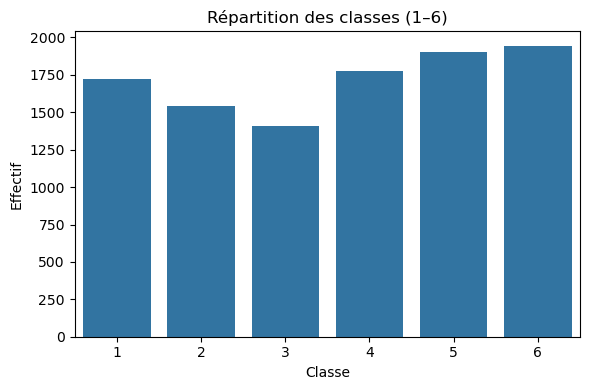

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=y_full)
plt.title("Répartition des classes (1–6)")
plt.xlabel("Classe")
plt.ylabel("Effectif")
plt.tight_layout()
plt.show()


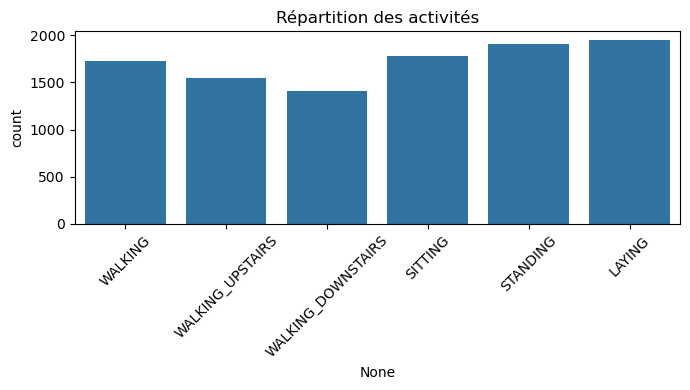

In [15]:
y_labels = pd.Series(y_full).map(activity_labels)

plt.figure(figsize=(7,4))
sns.countplot(x=y_labels, order=activity_labels.values())
plt.xticks(rotation=45)
plt.title("Répartition des activités")
plt.tight_layout()
plt.show()


In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7352, 561), (2947, 561), (7352,), (2947,))

In [18]:
X_full.describe().T.head(20)


,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,10299.0,0.274347,0.067628,-1.0,0.262625,0.277174,0.288354,1.0
tBodyAcc-mean()-Y,10299.0,-0.017743,0.037128,-1.0,-0.024902,-0.017162,-0.010625,1.0
tBodyAcc-mean()-Z,10299.0,-0.108925,0.053033,-1.0,-0.121019,-0.108596,-0.097589,1.0
tBodyAcc-std()-X,10299.0,-0.607784,0.438694,-1.0,-0.992360,-0.943030,-0.250293,1.0
tBodyAcc-std()-Y,10299.0,-0.510191,0.500240,-1.0,-0.976990,-0.835032,-0.057336,1.0
tBodyAcc-std()-Z,10299.0,-0.613064,0.403657,-1.0,-0.979137,-0.850773,-0.278737,1.0
tBodyAcc-mad()-X,10299.0,-0.633593,0.413333,-1.0,-0.993293,-0.948244,-0.302033,1.0
tBodyAcc-mad()-Y,10299.0,-0.525697,0.484201,-1.0,-0.977017,-0.843670,-0.087405,1.0
tBodyAcc-mad()-Z,10299.0,-0.614989,0.399034,-1.0,-0.979064,-0.845068,-0.288149,1.0
tBodyAcc-max()-X,10299.0,-0.466732,0.538707,-1.0,-0.935788,-0.874825,-0.014641,1.0


In [19]:
sample_feats = list(X_full.columns[:20])
X_full[sample_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,10299.0,0.274347,0.067628,-1.0,0.262625,0.277174,0.288354,1.0
tBodyAcc-mean()-Y,10299.0,-0.017743,0.037128,-1.0,-0.024902,-0.017162,-0.010625,1.0
tBodyAcc-mean()-Z,10299.0,-0.108925,0.053033,-1.0,-0.121019,-0.108596,-0.097589,1.0
tBodyAcc-std()-X,10299.0,-0.607784,0.438694,-1.0,-0.992360,-0.943030,-0.250293,1.0
tBodyAcc-std()-Y,10299.0,-0.510191,0.500240,-1.0,-0.976990,-0.835032,-0.057336,1.0
tBodyAcc-std()-Z,10299.0,-0.613064,0.403657,-1.0,-0.979137,-0.850773,-0.278737,1.0
tBodyAcc-mad()-X,10299.0,-0.633593,0.413333,-1.0,-0.993293,-0.948244,-0.302033,1.0
tBodyAcc-mad()-Y,10299.0,-0.525697,0.484201,-1.0,-0.977017,-0.843670,-0.087405,1.0
tBodyAcc-mad()-Z,10299.0,-0.614989,0.399034,-1.0,-0.979064,-0.845068,-0.288149,1.0
tBodyAcc-max()-X,10299.0,-0.466732,0.538707,-1.0,-0.935788,-0.874825,-0.014641,1.0


In [20]:
feature_variances = X_full.var().sort_values(ascending=False)
feature_variances.head(15)

fBodyAccJerk-entropy()-X         0.561720
fBodyAccJerk-entropy()-Y         0.539207
tBodyAccJerkMag-entropy()        0.524056
fBodyAcc-entropy()-X             0.522666
tGravityAcc-correlation()-X,Z    0.495532
tGravityAcc-correlation()-Y,Z    0.491624
tGravityAcc-energy()-X           0.485049
tGravityAcc-correlation()-X,Y    0.484871
tBodyGyroJerkMag-entropy()       0.479467
fBodyAccMag-entropy()            0.459960
tGravityAccMag-entropy()         0.448055
tBodyAccMag-entropy()            0.448055
fBodyBodyAccJerkMag-entropy()    0.444699
fBodyAcc-entropy()-Y             0.443791
tBodyAccJerk-entropy()-X         0.425972
dtype: float64

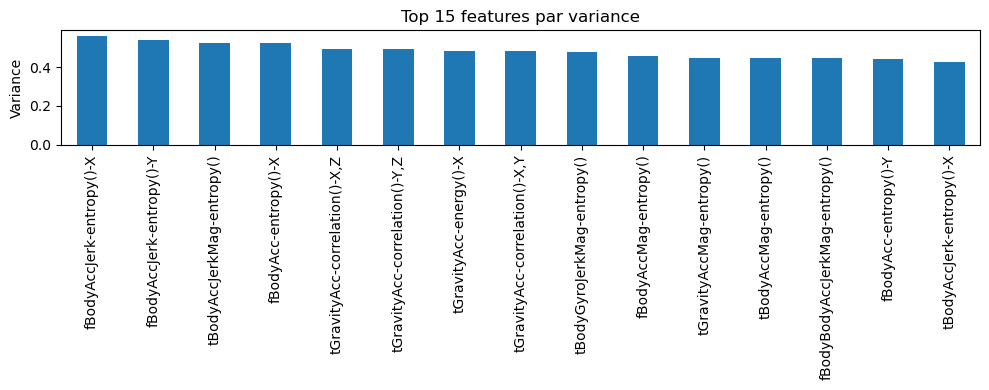

In [21]:
plt.figure(figsize=(10,4))
feature_variances.head(15).plot(kind="bar")
plt.title("Top 15 features par variance")
plt.ylabel("Variance")
plt.tight_layout()
plt.show()

In [22]:
from sklearn.feature_selection import f_classif

X = X_full.values
y = y_full

f_scores, p_values = f_classif(X, y)

f_scores_series = pd.Series(f_scores, index=X_full.columns).sort_values(ascending=False)
f_scores_series.head(15)

fBodyAccJerk-entropy()-X         50776.151143
tGravityAcc-mean()-X             46277.280777
tGravityAcc-min()-X              44357.625890
tGravityAcc-max()-X              41202.840578
tGravityAcc-energy()-X           40415.979748
fBodyAccJerk-entropy()-Y         37518.058265
fBodyBodyAccJerkMag-entropy()    32616.287290
tBodyAccJerkMag-entropy()        32507.550560
fBodyAcc-entropy()-X             32200.815739
tBodyAccJerk-entropy()-X         31258.365898
tBodyAcc-max()-X                 27861.539641
angle(X,gravityMean)             27073.455112
tBodyAccJerk-entropy()-Z         26849.773959
fBodyAccJerk-entropy()-Z         26541.091502
tBodyAccJerk-entropy()-Y         25365.432805
dtype: float64

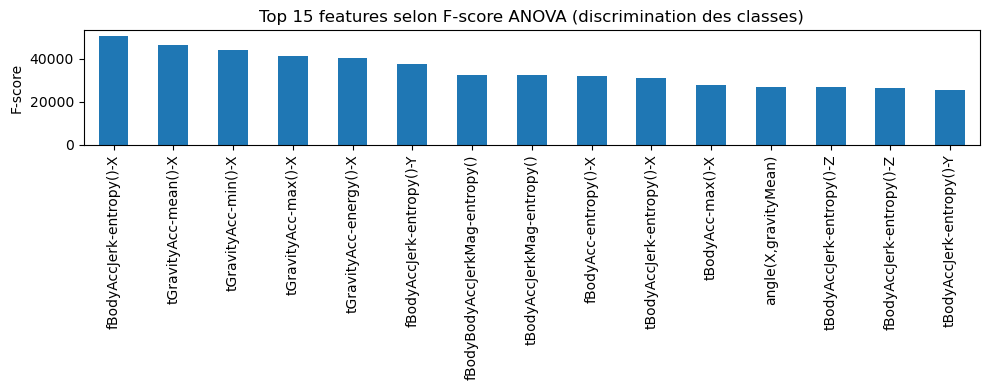

In [23]:
plt.figure(figsize=(10,4))
f_scores_series.head(15).plot(kind="bar")
plt.title("Top 15 features selon F-score ANOVA (discrimination des classes)")
plt.ylabel("F-score")
plt.tight_layout()
plt.show()


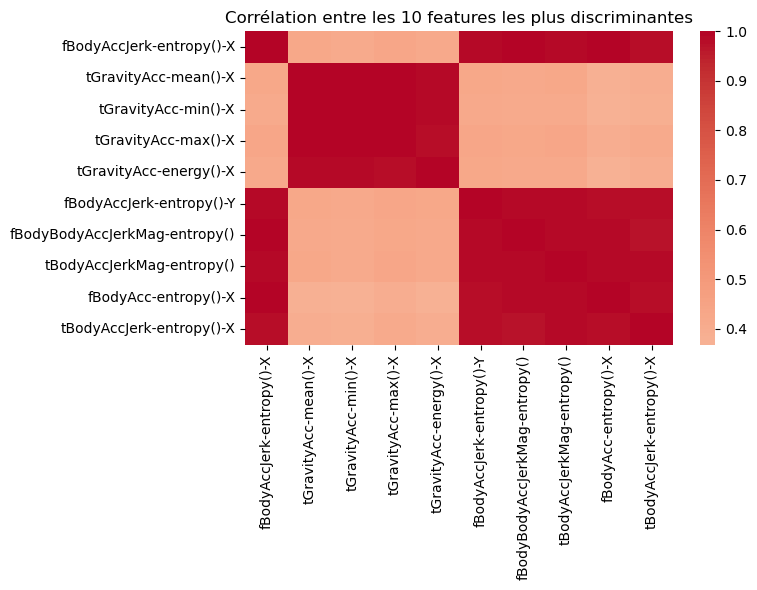

In [34]:
top_feats = list(f_scores_series.head(10).index)
corr_top = X_full[top_feats].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_top, annot=False, cmap="coolwarm", center=0)
plt.title("Corrélation entre les 10 features les plus discriminantes")
plt.tight_layout()
plt.show()


In [25]:
mean_features = [f for f in X_full.columns if "mean()" in f]
std_features  = [f for f in X_full.columns if "std()" in f]

len(mean_features), len(std_features), mean_features[:5]
mean_features = [f for f in X_full.columns if "mean()" in f]
std_features  = [f for f in X_full.columns if "std()" in f]

len(mean_features), len(std_features), mean_features[:5]


(33,
 33,
 ['tBodyAcc-mean()-X',
  'tBodyAcc-mean()-Y',
  'tBodyAcc-mean()-Z',
  'tGravityAcc-mean()-X',
  'tGravityAcc-mean()-Y'])

In [ ]:
mean_features_sample = mean_features[:10]  
group_means = (
    pd.DataFrame(X_full[mean_features_sample])
    .assign(activity_label=pd.Series(y_full).map(activity_labels))
    .groupby("activity_label")
    .mean()
)

group_means


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyGyro-mean()-X
activity_label,,,,,,,,,,
LAYING,0.268649,-0.018318,-0.107436,-0.375021,0.622270,0.555612,0.081847,0.011172,-0.004860,-0.016725
SITTING,0.273060,-0.012690,-0.105517,0.879731,0.108714,0.153774,0.075879,0.005047,-0.002487,-0.038431
STANDING,0.279153,-0.016152,-0.106587,0.941480,-0.184247,-0.014052,0.075028,0.008805,-0.004582,-0.026687
WALKING,0.276337,-0.017907,-0.108882,0.934992,-0.196713,-0.053825,0.076719,0.011506,-0.002319,-0.034728
WALKING_DOWNSTAIRS,0.288137,-0.016312,-0.105762,0.926457,-0.168507,-0.047971,0.089227,0.000747,-0.008729,-0.084035
WALKING_UPSTAIRS,0.262295,-0.025923,-0.120538,0.875003,-0.281377,-0.140796,0.076729,0.008759,-0.006010,0.006824


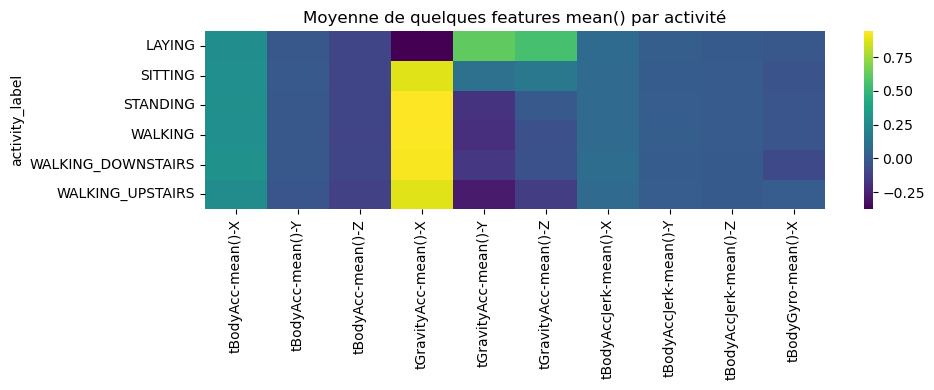

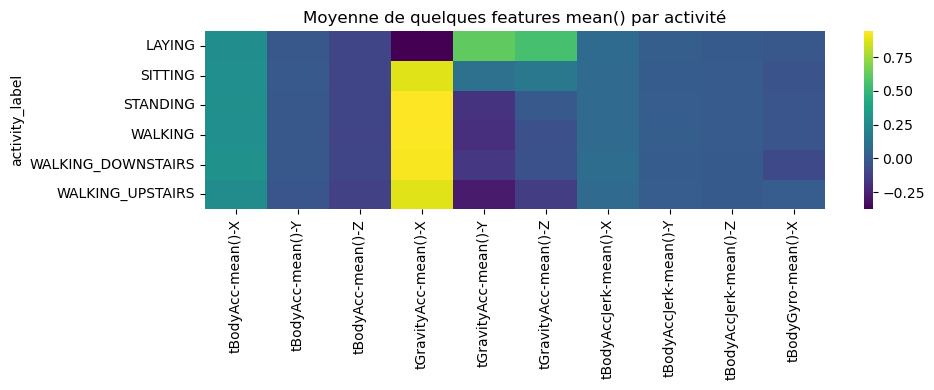

In [27]:
plt.figure(figsize=(10,4))
sns.heatmap(group_means, cmap="viridis")
plt.title("Moyenne de quelques features mean() par activité")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,4))
sns.heatmap(group_means, cmap="viridis")
plt.title("Moyenne de quelques features mean() par activité")
plt.tight_layout()
plt.show()


In [28]:
def plot_feature_by_activity(feature_name, sample_size=4000):
    if feature_name not in X_full.columns:
        raise ValueError("Feature inconnue")

    df_tmp = X_full.copy()
    df_tmp["activity_id"] = y_full
    df_tmp["activity_label"] = df_tmp["activity_id"].map(activity_labels)

    df_sample = df_tmp.sample(sample_size, random_state=42)

    plt.figure(figsize=(8,4))
    sns.boxplot(x="activity_label", y=feature_name, data=df_sample)
    plt.xticks(rotation=45)
    plt.title(f"Distribution de {feature_name} par activité (boxplot)")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,4))
    sns.violinplot(x="activity_label", y=feature_name, data=df_sample, inner="quartile")
    plt.xticks(rotation=45)
    plt.title(f"Distribution de {feature_name} par activité (violin)")
    plt.tight_layout()
    plt.show()


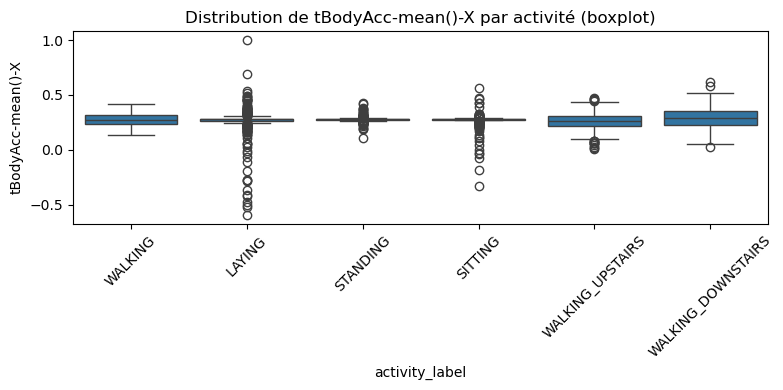

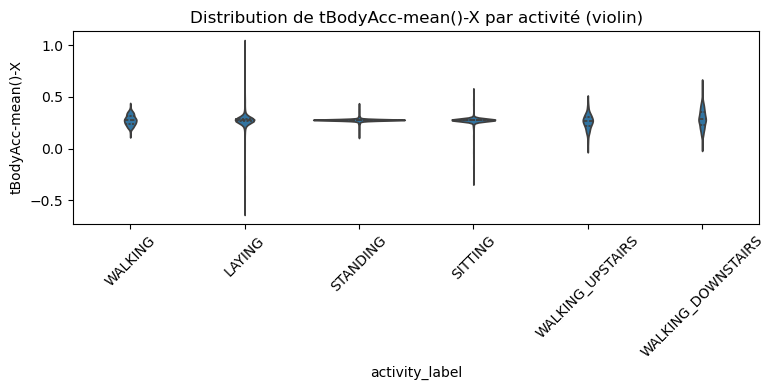

In [29]:
plot_feature_by_activity(mean_features[0])


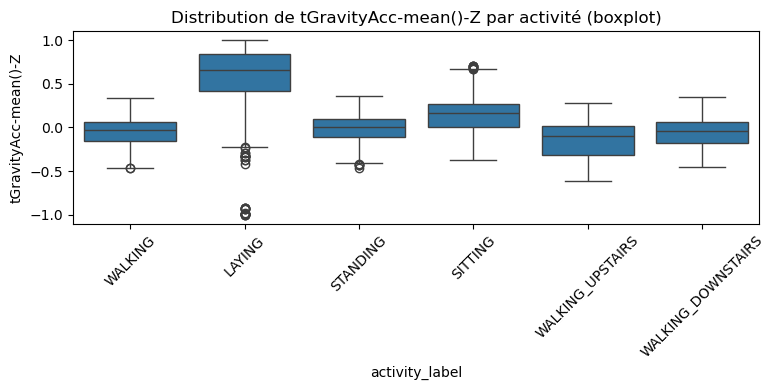

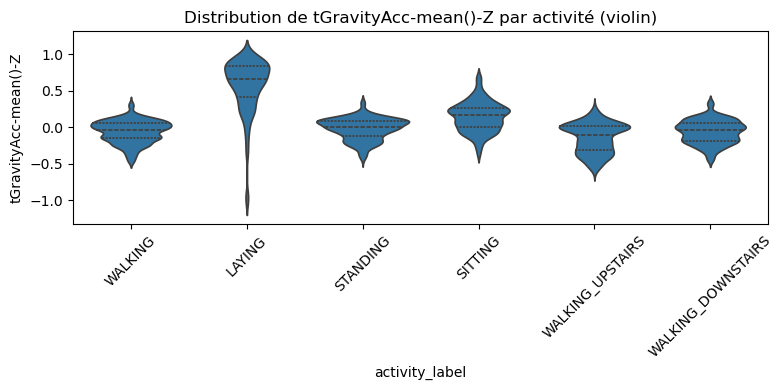

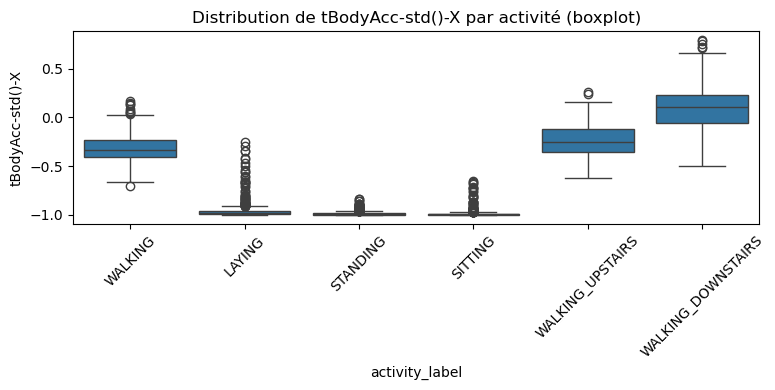

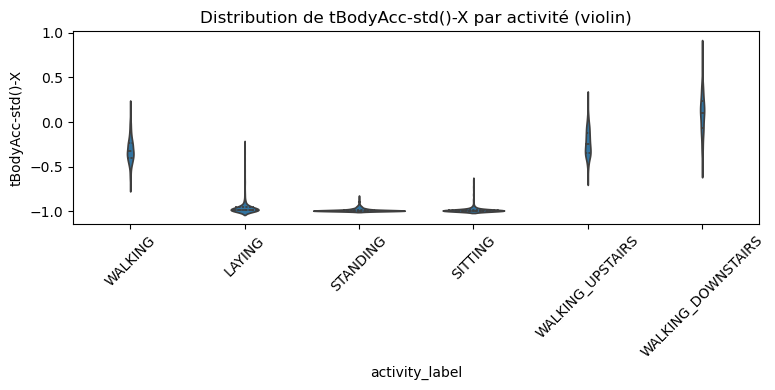

In [30]:
plot_feature_by_activity(mean_features[5])
plot_feature_by_activity(std_features[0])

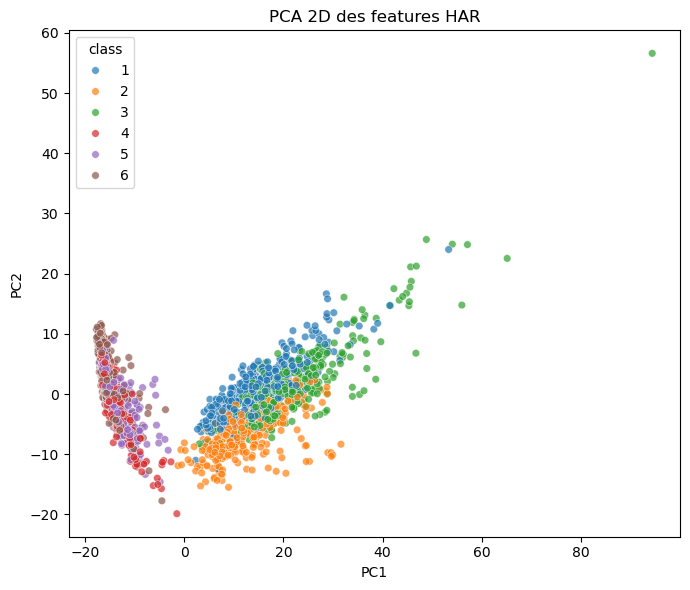

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# échantillon pour que ça soit rapide
sample_idx = np.random.choice(len(X_full), size=2000, replace=False)
X_sample = X_full.iloc[sample_idx].values
y_sample = y_full[sample_idx]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "class": y_sample
})

plt.figure(figsize=(7,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="class", palette="tab10", alpha=0.7, s=30)
plt.title("PCA 2D des features HAR")
plt.tight_layout()
plt.show()


C:\Users\hp\anaconda\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


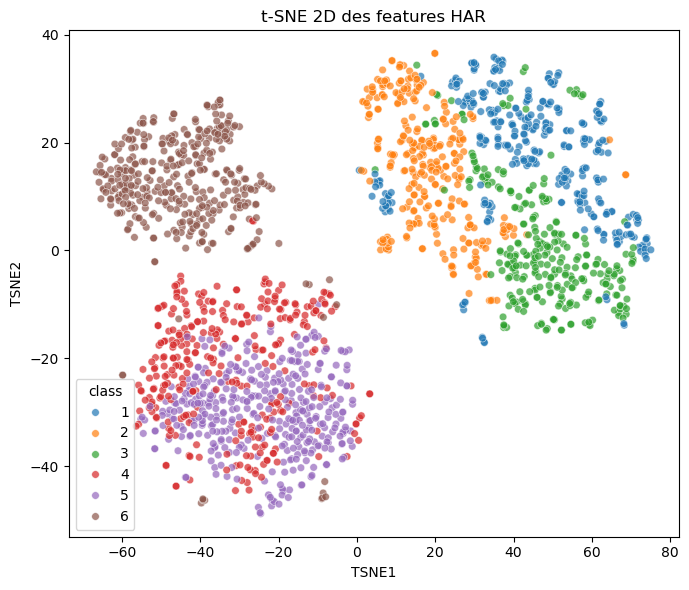

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)  # on réutilise X_scaled du PCA

tsne_df = pd.DataFrame({
    "TSNE1": X_tsne[:, 0],
    "TSNE2": X_tsne[:, 1],
    "class": y_sample
})

plt.figure(figsize=(7,6))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="class", palette="tab10", alpha=0.7, s=30)
plt.title("t-SNE 2D des features HAR")
plt.tight_layout()
plt.show()


In [36]:
from pathlib import Path
import joblib

out_dir = Path("/data/processed")
out_dir.mkdir(parents=True, exist_ok=True)

joblib.dump(X_full, out_dir / "X_full.joblib")
joblib.dump(y_full, out_dir / "y_full.joblib")

print("Saved X_full & y_full in", out_dir)


Saved X_full & y_full in \data\processed
